### KNN 모델을 이용해서 BMI데이터학습

- BMI 데이터구성
 - 특징(문제): 성별,모무게,키
 - 특징(답지) : index : 0,1,2,3,4,5
    - 0 : 저체중
    - 1 :
    - 2 : 정상 체중
    - 3 : 비만
    - 4 : 경도 비만
    - 5 : 초고도 비만

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [ ]:
# /content/drive/MyDrive/폴리텍전남캠퍼스/data/bmi.csv

### 데이터 가져오기

In [2]:
bmi_df = pd.read_csv('/content/drive/MyDrive/폴리텍전남캠퍼스/data/bmi.csv')

In [3]:
bmi_df

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3
...,...,...,...,...
495,Female,150,153,5
496,Female,184,121,4
497,Female,141,136,5
498,Male,150,95,5


In [4]:
# 데이터 정보
bmi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Index   500 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.8+ KB


In [5]:
# 통계값 출력
# 데이터가 숫자로 되어있는 특징만 보여주세요
bmi_df.describe()

,Height,Weight,Index
count,500.000000,500.000000,500.000000
mean,169.944000,106.000000,3.748000
std,16.375261,32.382607,1.355053
min,140.000000,50.000000,0.000000
25%,156.000000,80.000000,3.000000
50%,170.500000,106.000000,4.000000
75%,184.000000,136.000000,5.000000
max,199.000000,160.000000,5.000000


In [7]:
# 텍스트로 되어있는 특징만 보여주세요
# include='object'
bmi_df.describe(include='object')

,Gender
count,500
unique,2
top,Female
freq,255


In [8]:
# 데이터를 그래프로 표현할때
# 데이터 시각화 하는 도구
import matplotlib.pyplot as plt
import seaborn

def myScatter(label,color):
  tmp = bmi_df[bmi_df['Index'] == label]
  # 종류별로 쪼개진 데이터 산점도 그리기
  plt.scatter(tmp['Weight'],tmp['Height'], c = color, label = label)

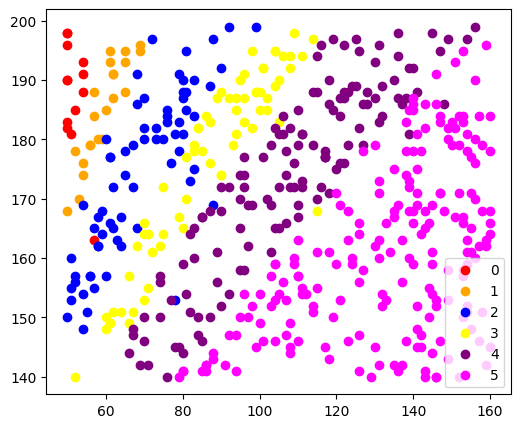

In [9]:
plt.figure(figsize=(6,5))
# 답지 : 0,1,2,3,4,5
myScatter(0,'red') # 심각한 저체중
myScatter(1,'orange') # 저체중
myScatter(2,'blue') # 정상
myScatter(3,'yellow') # 비만
myScatter(4,'purple') # 과체중
myScatter(5,'magenta') # 고도비만
plt.legend()




### train, test 데이터 분리


In [13]:
# train = 400
# test = 100
train = bmi_df.iloc[0:400]
test = bmi_df.iloc[400:]

In [14]:
train.shape,test.shape

((400, 4), (100, 4))

In [18]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 400 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  100 non-null    object
 1   Height  100 non-null    int64 
 2   Weight  100 non-null    int64 
 3   Index   100 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 3.3+ KB
